# Introduction to Machine Learning (Part 1)


## Imports

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import packages

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

## Statistical Background


### Types of Data
- Numerical 
- Categorical

In [ ]:
# numerical
a = [1, 2, 3, 4, 5] # discrete
b = [0.001, 0.002, 0.003, 0.004, 0.005] # continuous

# categorical
c = ['a', 'b', 'c', 'd', 'e'] # ordinal
d = ['cat', 'dog', 'bird', 'fish', 'lizard'] # nominal

### Types of Variables 

- **Independent Variables** also called input variables, explanatory variables, predictors, features, or attributes.
- **Dependent Variables** also called outcome variable, response variable, output variable, or class.

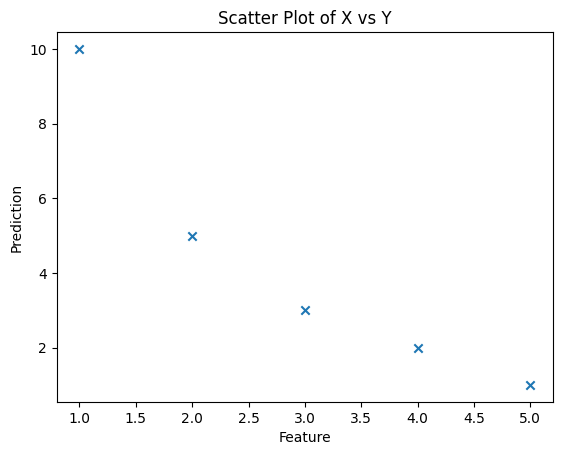

In [12]:
x = [1, 2, 3, 4, 5]
y = [10, 5, 3, 2, 1]

# create figure
plt.scatter(
    x,
    y,
    marker='x'
)

plt.xlabel('Feature')
plt.ylabel('Prediction')
plt.title('Scatter Plot of X vs Y');

### Sampling
**Sample Space**: The set of all possible outcomes of an random trial.

In [4]:
# create a random number generator
rng = np.random.default_rng(seed=42)

In [14]:
# consider a coin flip
result_c = rng.choice(['heads', 'tails'], size=1) # what is the sample space?

# consider a die roll
result_d = rng.choice([1, 2, 3, 4, 5, 6], size=2) # what is the sample space?

print(result_c)
print(result_d)


['tails']
[5 5]


### Probability Distributions (Distributions)

"A distribution is a function that gives the probabilities of occurrence of possible outcomes for an experiment."

**Examples**:
- Uniform Distribution
- Normal Distribution
- Binomial Distribution
- etc.



**Normal Distribution**

<img src="./extra/imgs/normal_dist.png" alt="normal distribution" width="600" height="300"/>


**Uniform Distribution**

<img src="./extra/imgs/uniform_dist.png" alt="uniform distribution" width="550" height="300"/>


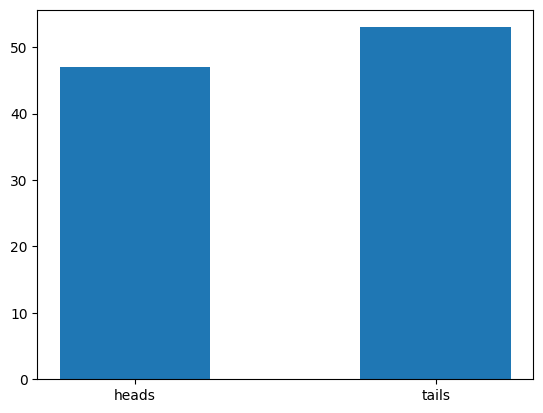

In [220]:
# consider a coin flip again

result_c = rng.choice(['heads', 'tails'], size=100) 

head_count = np.count_nonzero(result_c == 'heads')
tail_count = np.count_nonzero(result_c == 'tails')

plt.bar(x=['heads', 'tails'], height=[head_count, tail_count], width=0.5)

plt.show()
# what type of distribution are we sampling from?

### Normalization

### Distance 

- **L1 Distance** (i.e. Manhattan Distance)
- **L2 Distance** (i.e. Euclidean Distance)

<img src="./extra/imgs/l1_vs_l2_distance.svg.png" alt="normal distribution" width="350" height="350"/>

For any points $p, q \in R^2$:

$L1(p, q)=|p_1 - p_2| + |q_1 + q_2|$

In [4]:
x1, x2 = 2, 10
y1, y2 = 3, -1

# L1 Distance

# 1 dim
dist1 = np.abs(x1-x2)

# 2 dim
dist2 = np.abs(x1 - x2) + np.abs(y1 - y2)

print(f'L1 Distance in one dimension: {dist1}')
print(f'L1 Distance in two dimensions: {dist2}')

L1 Distance in one dimension: 8
L1 Distance in two dimensions: 12


For any points  $p, q \in R^2$

$L2(p, q)=\sqrt{(p_1 - p_2)^2 + (q_1 - q_2)^2}$

In [5]:
x1, x2 = 2, 10
y1, y2 = 3, -1

# L2 Distance

# 1 dim
dist1 = np.sqrt(np.pow(x1 - x2, 2))

# 2 dim
dist2 = np.sqrt(np.pow(x1 - x2, 2) + np.pow(y1 - y2, 2))

print(f'L2 Distance in one dimension: {dist1}')
print(f'L2 Distance in two dimensions: {dist2}')


L2 Distance in one dimension: 8.0
L2 Distance in two dimensions: 8.94427190999916


## Linear/Logistic Regression


<img src="./extra/imgs/lin_and_log_reg.png" alt="normal distribution" width="600" height="300"/>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

Coefficients: W=-2.2 b=11.8
Mean squared error: 0.08
R squared score: 0.99


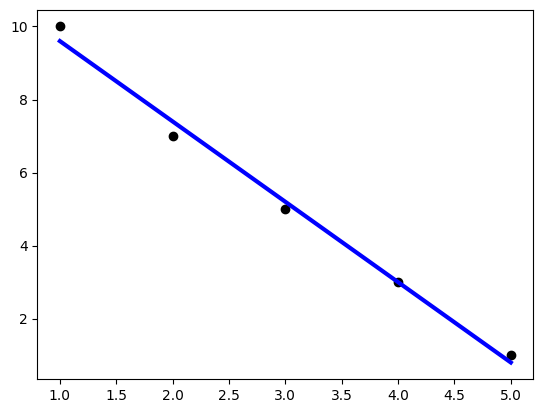

In [43]:
# TODO Introduce parameters (of models).

x = np.array([[1], [2], [3], [4], [5]])
y = np.array([[10], [7], [5], [3], [1]])

model = LinearRegression()
model.fit(x, y)

preds = model.predict(x)

plt.scatter(x, y, marker='o', color='black')
plt.plot(x, preds, color='blue', linewidth=3);

# The parameters of the model
print(f"Slope and y-intercept: W={model.coef_.item()} b={model.intercept_.item()}")
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, preds))
# Proportion of Y that is predictable with X: 1 is perfect prediction
print("R squared score: %.2f" % r2_score(y, preds))

plt.show()

In [47]:
# Linear Regression is not an iterative process (i.e. there is no learning occurring)

# Lets calculate the coeffecient and the intercept ourselves
n = len(x)
b = (sum(y)*sum(np.pow(x, 2)) - sum(x)*sum(x*y)) / (n*sum(np.pow(x,2)) - np.pow(sum(x), 2))
w = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(np.pow(x, 2)) - np.pow(sum(x), 2))

print(f'Coeffecients W = {}')

[11.8]


### Logisitc Regression



In [46]:
from sklearn.linear_model import LogisticRegression


## What is Machine Learning?

Application of artificial intelligence ( AI ) algorithms that are able to 
learn from data and imitate the way human beings make decisions without explicit instructions.

**Machine Learning Uses:**
* Prediction
* Image Recognition
* Speech recognition
* Medical Diagnoses

## Types of Machine Learning

**Supervised Learning:**
* System is trained on labeled Data
* EX: classification,regression

**Unsupervised Learning:**
* System is trained on unlabeled data
* EX: Clustering, Association

## Four Steps to Creating an ML ( Machine Learning ) Model

1. Select and Prepare a Dataset
2. Choose an algorithm to run on the dataset
3. Train the algorithm
4. Using & Improving the model

## First Model : Decision Tree

In [50]:
from sklearn.datasets import load_breast_cancer

In [53]:
# Load bread cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [54]:
# Lets take a look at our features

print(X)

# Features, aka the columns of our data, represent data variables that help our model learn patterns

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [55]:
# Lets look at our target

print(y)

# Since this is a binary classification problem, we are determining whether or not cancer is benign or malignant
# 0 = malignant ( cancerous ), 1 = benign

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [56]:
# Lets look at our class distribiion

print(f"Class distribution: \n{pd.Series(y).value_counts()}")

Class distribution: 
1    357
0    212
Name: count, dtype: int64


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [85]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Train a simple decision tree for visualization
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

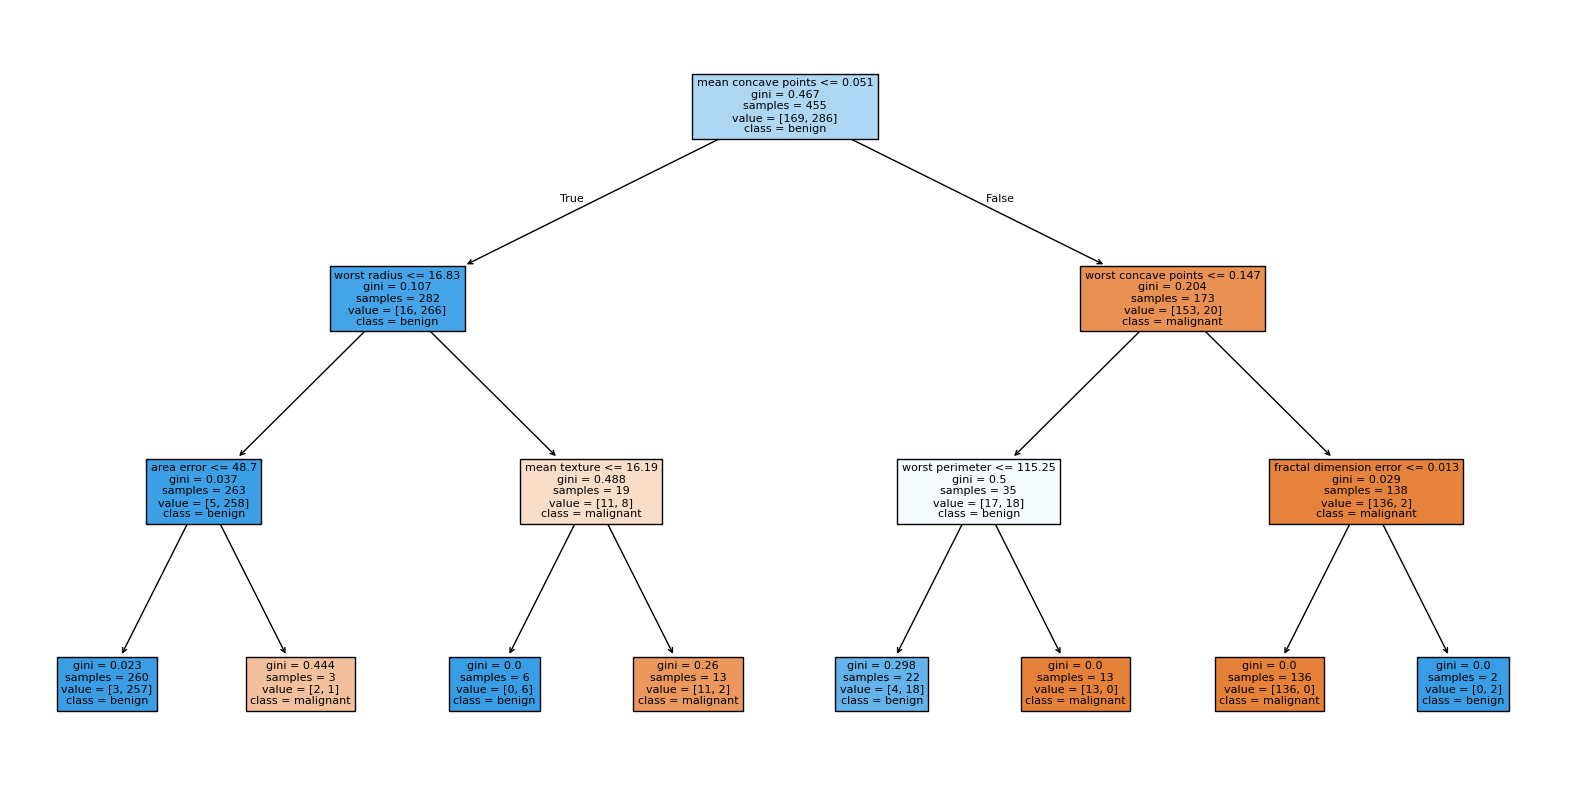

In [63]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

In [64]:
# try it with a bigger max_depth

dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit on the training Data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


## **METRICS**

* When working with classification tasks, we often use metrics based on the proportion of true and false predicitions

Example: Breast Cancer Prediction

**True Positive:** Amount of correctly identified malignant tumors

**False Positive:** Amount of incorrectly identified malignant tumors

**True Negative:** Amount of correctly identified benign tumors

**False Negative:** Amount of incorrectly identified benign tumors

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
# Evaluate Prediction Quality
# sklearn accuracy_score() returns the accuracy score of the given predictions

accuracy_score(y_test, y_pred)

0.9473684210526315

### **Accuracy Score:**

Proportion of all scores that are correct

ACC = ( TN + TP ) / ALL SCORES


In [69]:
# You could also use...
# DecisionTreeClassifier.score() returns the accuracy score of the given predictions

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(train_score)
print(test_score)

0.9956043956043956
0.9473684210526315


In [ ]:
# Evaluating with Classification Report

clf_report = classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### **Precision:**
- Measures the quality / accuracy of the predicitions, AKA, how often the model predicts correctly.

( When we predict cancer, how often are we correct ? )

TP / ( TP + FP )

### **Recall:**
- For all of the positive samples, this is the fraction that we correctly classified.

( Of all the cancer cases, how many did we catch ? )

TP / ( TP + FN )

### When to use which ?

Precision Priority
* Email spam filtering (better to let spam through than block real emails)

Recall Priority
* Cancer screening (better to have false alarms than miss cancer)
* Fraud detection (better to investigate false leads than miss fraud)

<br/>

**F1-Score**
* balanced measure of performance, computes the average of precision and recall

### Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

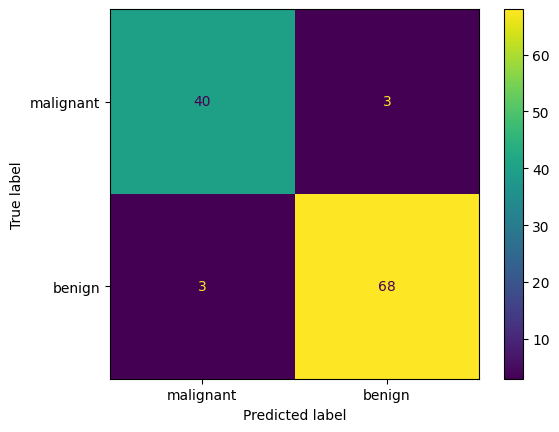

In [79]:
# Evaluating with Confusion Matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = ['malignant', 'benign'])

cm_display.plot()
plt.show()

### MINI CHALLENGE :)

**Hyperparameter Tuning**:
* This is a key step in using ML algorithms, where you find the best parameters to use when training a model

Manipulate the parameters of the original Decision tree to achive a better accuracy score.
There are many different parameters you can use to help increase Decision Tree accuracy...

- max_depth: limits how deep the tree can grow
- min_samples_split: minimum samples required to split at a node
- min_samples_leaf: each leaf must have this many samples
- random_state: controls the randomness of a tree

In [ ]:
dt_new = DecisionTreeClassifier( ______ )

dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print( accuracy_score(y_test, y_pred_new) )

## Second Model: RandomForest

**Random Forest**:
* an algorithm that combines the output of multiple trees to reach a result.

For classification tasks, the output is the class selected by the most trees

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Initialize and fit your Random Forest Classifier on the same data

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [82]:
# Evaluate, did the RF model perform better than the DT?

accuracy_score(y_test, rf_pred)

0.9649122807017544

## Underfitting vs Overfitting

When evaluating the quality of a ML model, it is important to determine the quality of the fit.

**Overfitting**:
* The model is too complex and fits the training data too closely, thus is unable to make quality predicitons on new data
* High Training Accuracy with low testing accuracy


**Underfitting**
* The model is too simple, and cannot find the underlying patterns of the data
* Poor training and testing accuracies

In a good balanced model, the algorithm will capture important patterns without memorizing the training data.

<img src="extra\imgs\under_over_fitting.png" alt="Overfitting vs Underfitting">


In [92]:
underfit_rf = RandomForestClassifier(
    n_estimators=1,  # Very few trees
    max_depth=1,     # Very shallow trees
    random_state=42
)

underfit_rf.fit(X_train, y_train)
rf_pred_train = underfit_rf.predict(X_train)
rf_pred_test = underfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 0.920
Test Accuracy: 0.912
Gap: 0.007


In [94]:
good_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=4,
    random_state=42
)

good_rf.fit(X_train, y_train)
rf_pred_train = good_rf.predict(X_train)
rf_pred_test = good_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 0.987
Test Accuracy: 0.971
Gap: 0.017


In [93]:
overfit_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,  # Unlimited depth
    min_samples_leaf=1,  # Allow single-sample leaves
    random_state=42
)

overfit_rf.fit(X_train, y_train)
rf_pred_train = overfit_rf.predict(X_train)
rf_pred_test = overfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.971
Gap: 0.029


## Feature Importance

Feature selection is an important step for improving your Machine learning model.
By removing unneccesary features ( columns ), sometimes you can improve the performance and runtime of your model.

In [95]:
# Some classifiers such as Random Forest, have built in tools to help you determine feature importance
# lets determine the best features using our good_rf model

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': good_rf.feature_importances_
}).sort_values('importance', ascending=False)

In [96]:
print("\nTop 5 Most Important Features (Random Forest):")
print(rf_importance.head())


Top 5 Most Important Features (Random Forest):
                 feature  importance
7    mean concave points    0.157346
27  worst concave points    0.136591
23            worst area    0.126897
20          worst radius    0.085040
6         mean concavity    0.082966


## Mini Challenge :)

Using Feature importance, determine top 3 least important features.

Then, see what removing them from the data does for your model.

In [97]:
print("\n Least Important Features (Random Forest):")
print(rf_importance.tail())


 Least Important Features (Random Forest):
                   feature  importance
9   mean fractal dimension    0.002389
14        smoothness error    0.002207
18          symmetry error    0.001828
11           texture error    0.001530
8            mean symmetry    0.000994


In [100]:
# Drop your feature(s)

X_new = X.drop(['mean symmetry', 'texture error', 'symmetry error', 'smoothness error'], axis=1, inplace=False)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [101]:
# Evaluate your new model using good_rf, did the performance improve?

good_rf.fit(X_train_new, y_train_new)
rf_pred_train = good_rf.predict(X_train_new)
rf_pred_test = good_rf.predict(X_test_new)

train_score =  accuracy_score(y_train_new, rf_pred_train)
test_score =  accuracy_score(y_test_new, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

# !!!Problem: only mean symmetry really imporves the training accuracy and only by a lil bit, might want to use diff data?

Train Accuracy: 0.987
Test Accuracy: 0.971
Gap: 0.017
